In [1]:
from fuzzy_aggregator import create_aggregator
import numpy as np 
import matplotlib.pyplot as plt 
import control as ctrl
from optimizer import run_experiment
from optimizer_utils import weighted_sum_circuit_fitness, create_control_system_dc_motor, fuzzy_aggregator_circuit_fitness, create_control_system_circuit, mono_objective_circuit_fitness

In [2]:
fuzzy_evaluator = create_aggregator()

## Time-delay plant

In [3]:
# Original transfer function coefficients
numerator = [5]
denominator = [15, 8, 1]
T = 15
order = 2
# Create the Padé approximation
num_approx, den_approx = ctrl.pade(0.3, order)  # Use the Padé approximation function

# Create the polynomial transfer function approximation
approx_num = np.convolve(numerator, num_approx)
approx_den = np.convolve(denominator, den_approx)

In [4]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=approx_num, den=approx_den, scale=[5, 5], T=T)
results_d_ws, metrics_d_ws = run_experiment(approx_num, approx_den, weighted_sum_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

d:\thiago\phd\gradvec\lib\site-packages\control\timeresp.py:1054: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
d:\thiago\phd\gradvec\lib\site-packages\control\timeresp.py:1054: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]


 The best solution found:                                                                           
 [  5.   3.  18.   6.  21.   5.  12.   2.  13. -12.  12.  -8.]

 Objective function:
 0.5831608684956684
[   16000 56000000  7500000     3300]
[3.6e-11 3.3e-07]
Kp = 1.5400000480000002, Kd = 8.870399999999999e-07, Ki = 0.08333333333333333
 The best solution found:                                                                           
 [22.  6. 15.  5. 22.  4.  1.  6.  1. -8. 17. -8.]

 Objective function:
 0.22914299768626256
[82000000  4300000   820000 11000000]
[1.1e-07 5.1e-07]
Kp = 3.5968027901225925, Kd = 6.345121951219512, Ki = 0.3207707830306424


d:\thiago\phd\gradvec\lib\site-packages\control\timeresp.py:1056: RuntimeWarning: overflow encountered in matmul
  yout = C @ xout + D @ U


 The best solution found:                                                                           
 [15.  4. 13.  4.  0.  6. 14.  6. 11. -7. 13. -6.]

 Objective function:
 0.30182439702326974
[  430000   360000 10000000 39000000]
[3.0e-06 3.6e-05]
Kp = 3.5901162790697674, Kd = 4.212, Ki = 0.25193798449612403
||||||||||||||||||||||||||||||||__________________ 63.3% GA is running...

d:\thiago\phd\gradvec\lib\site-packages\control\timeresp.py:1578: RuntimeWarning: overflow encountered in double_scalars
  overshoot = np.abs(100. * dy_os / InfValue)


 The best solution found:                                                                           
 [22.  6. 14.  4.  6.  2. 18.  4. 11. -9.  4. -6.]

 Objective function:
 0.18540617698898096
[82000000   390000     1800   560000]
[3.0e-08 1.5e-05]
Kp = 2.1018970189701895, Kd = 3.6400000000000006, Ki = 0.2529358626919603
 The best solution found:                                                                           
 [15.  5.  8.  4. 22.  2. 14.  3. 12. -7. 10. -7.]

 Objective function:
 0.5080250506042446
[4300000  220000    8200   39000]
[3.3e-06 2.7e-06]
Kp = 6.056343354131216, Kd = 3.4529268292682924, Ki = 0.4096552593432911


In [5]:
mono_objective_fitness = mono_objective_circuit_fitness(num=approx_num, den=approx_den, T=T)
results_d_m, metrics_d_m = run_experiment(approx_num, approx_den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [19.  5. 20.  5.  0.  6. 17.  6. 12. -9. 14. -7.]

 Objective function:
 0.3494531892108651
[ 6200000  6800000 10000000 51000000]
[3.3e-08 3.9e-06]
Kp = 5.63670223325062, Kd = 1.1444400000000001, Ki = 0.2109181141439206
 The best solution found:                                                                           
 [18.  3. 21.  4. 17.  3. 18.  2. 20. -8. 15. -6.]

 Objective function:
 0.35296048310417244
[ 56000 750000  51000   5600]
[6.8e-07 4.3e-05]
Kp = 1.4723246694026446, Kd = 0.056, Ki = 0.045599635202918376
 The best solution found:                                                                           
 [22.  5. 20.  6.  7.  5. 18.  4. 22. -9.  2. -8.]

 Objective function:
 0.253862941044584
[ 8200000 68000000  2000000   560000]
[8.2e-08 1.2e-07]
Kp = 2.5132845528455285, Kd = 1.56128, Ki = 0.2845528455284553
 The best solution found:                                   

In [6]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, scale=[5, 5], num=approx_num, den=approx_den, T=T)
results_d, metrics_d = run_experiment(approx_num, approx_den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

Settling time: 1.00 s, rise time: 1.44 s, overshoot: 18.71 %
|||_______________________________________________ 6.7% GA is running...Settling time: 1.00 s, rise time: 1.97 s, overshoot: 7.37 %
|||||_____________________________________________ 10.0% GA is running...Settling time: 0.98 s, rise time: 0.26 s, overshoot: 49.37 %
||||||||__________________________________________ 16.7% GA is running...Settling time: 1.00 s, rise time: 1.44 s, overshoot: 18.71 %
||||||||||________________________________________ 20.0% GA is running...Settling time: 1.00 s, rise time: 4.37 s, overshoot: 7.75 %
Settling time: 1.00 s, rise time: 0.96 s, overshoot: 3.69 %
Settling time: 1.00 s, rise time: 9.37 s, overshoot: 0.00 %
||||||||||||______________________________________ 23.3% GA is running...Settling time: 1.00 s, rise time: 1.44 s, overshoot: 18.71 %
Settling time: 1.00 s, rise time: 1.65 s, overshoot: 12.73 %
|||||||||||||_____________________________________ 26.7% GA is running...Settling time: 1.0

d:\thiago\phd\gradvec\lib\site-packages\control\timeresp.py:1586: RuntimeWarning: overflow encountered in double_scalars
  undershoot = (-100. * y_us / InfValue)


||||||||||||||||||||______________________________ 40.0% GA is running...Settling time: 1.00 s, rise time: 0.47 s, overshoot: 47.71 %
|||||||||||||||||||||||___________________________ 46.7% GA is running...Settling time: 0.41 s, rise time: 0.39 s, overshoot: 23.03 %
|||||||||||||||||||||||||_________________________ 50.0% GA is running...Settling time: 0.77 s, rise time: 0.37 s, overshoot: 34.57 %
Settling time: 0.35 s, rise time: 0.35 s, overshoot: 28.50 %
||||||||||||||||||||||||||||||____________________ 60.0% GA is running...Settling time: 0.35 s, rise time: 0.35 s, overshoot: 28.50 %
Settling time: 0.35 s, rise time: 0.35 s, overshoot: 28.50 %
||||||||||||||||||||||||||||||||__________________ 63.3% GA is running...Settling time: 0.41 s, rise time: 0.39 s, overshoot: 23.03 %
Settling time: 0.35 s, rise time: 0.35 s, overshoot: 28.50 %
Settling time: 0.46 s, rise time: 0.35 s, overshoot: 26.48 %
Settling time: 1.00 s, rise time: 0.20 s, overshoot: 89.07 %
Settling time: 0.91 s, ri

In [7]:
# avg_d = metrics_d.mean(axis=0)
# std_d = metrics_d.std(axis=0)
# print(avg_d)
# print(std_d)

# avg_d_ws = metrics_d_ws.mean(axis=0)
# std_d_ws = metrics_d_ws.std(axis=0)
# print(avg_d_ws)
# print(std_d_ws)

# avg_d_m = metrics_d_m.mean(axis=0)
# std_d_m = metrics_d_m.std(axis=0)
# print(avg_d_m)
# print(std_d_m)


In [90]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

rcParams.update({'font.size': 22})


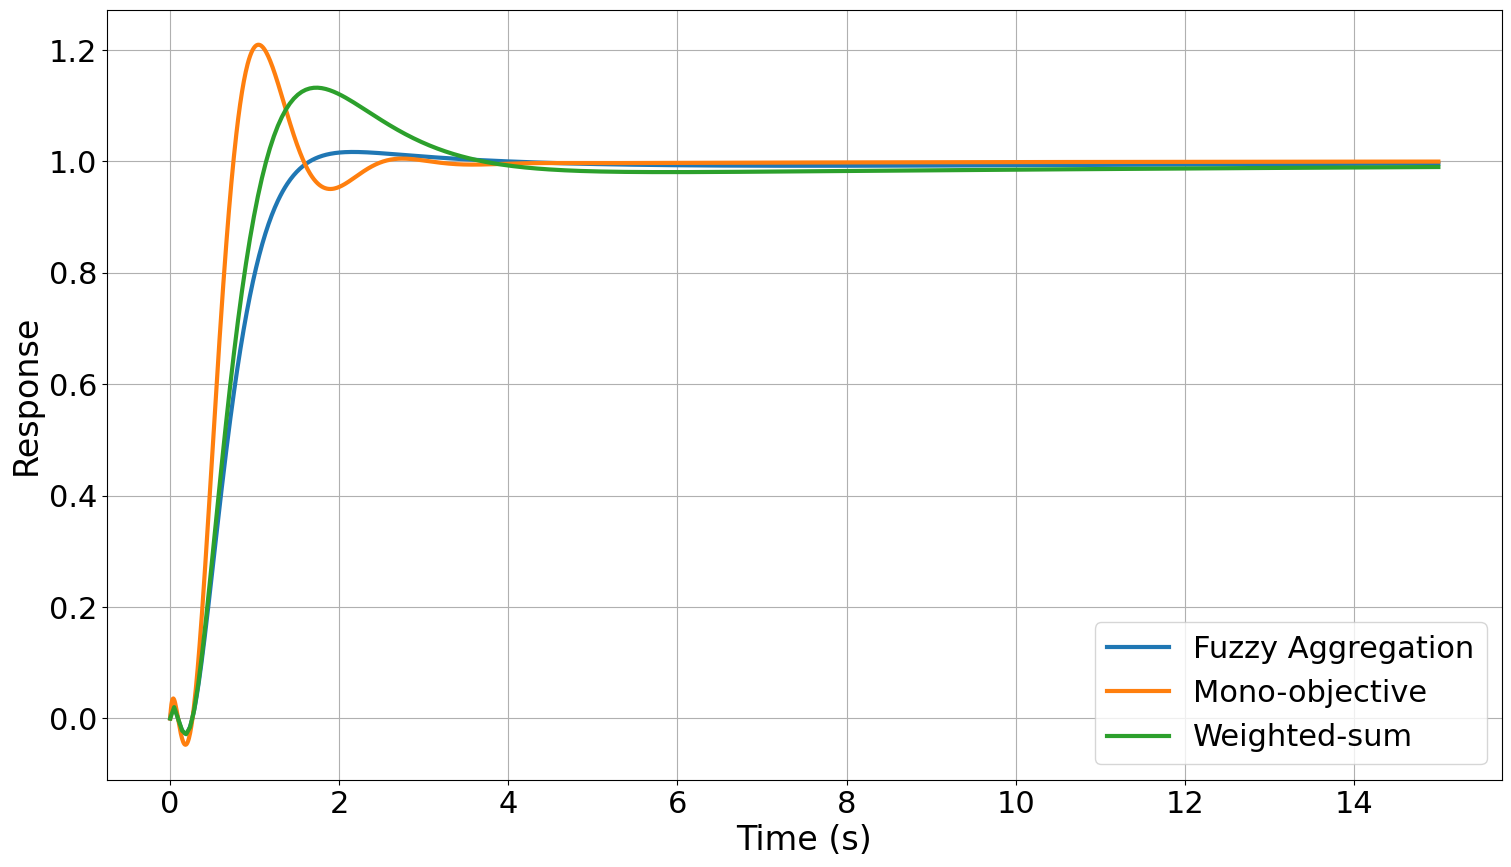

In [95]:
plt.figure(figsize=(18,10))
a = 2
b = 4
c = 2
plt.plot(metrics_d[a]['t'], metrics_d[a]['res'],label='Fuzzy Aggregation', linewidth=3)
plt.plot(metrics_d_m[b]['t'], metrics_d_m[b]['res'], label='Mono-objective', linewidth=3)
plt.plot(metrics_d_ws[c]['t'], metrics_d_ws[c]['res'], label='Weighted-sum', linewidth=3)
plt.grid()
plt.legend()
plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Response', fontsize=24)
plt.show()

## 0. Motor DC

In [9]:
def motor(y, t, u):
    omega, i = y
    voltage = np.clip(u, -v_max, v_max)
    di_dt = (voltage - R * i - K * omega) / L
    domega_dt = (K * i - B * omega) / J
    return [domega_dt, di_dt]

# DC motor parameters
R = 1.0  # Resistance
L = 0.5  # Inductance
K = 0.01  # Back EMF constant
J = 0.01  # Inertia
B = 0.1  # Damping

# Saturation limits
v_max = 25.0  # Maximum voltage

# Transfer function numerator and denominator coefficients
num = [K]
den = [J * L, B * L + R * J, R * B + K ** 2]
T = 15
# create_control_system_dc_motor(motor, numerator, denominator, v_max=15, max_derivative = 3.0)

### 1. Using Fuzzy Aggregator

In [10]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, scale=[5,5], create_system=create_control_system_dc_motor, motor=motor, num=num, den=den, T=T)
results_0, metrics_0 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

d:\thiago\fuzz_ga\optimizer_utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  derivative_error = (error - prev_error) / (t[i] - (t[i-1] if i > 0 else 0))
d:\thiago\fuzz_ga\optimizer_utils.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  derivative_limit = max_derivative * (control_signal - prev_control_signal) / (t[i] - (t[i-1] if i > 0 else 0))


Settling time: 0.53 s, rise time: 2.50 s, overshoot: 1.07 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 0.41 %
Settling time: 1.00 s, rise time: 7.93 s, overshoot: -0.01 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 1.25 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 1.12 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 0.87 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 0.88 %
Settling time: 1.00 s, rise time: 5.58 s, overshoot: -0.00 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 0.59 %
||________________________________________________ 3.3% GA is running...Settling time: 1.00 s, rise time: 3.87 s, overshoot: -0.00 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 0.72 %
Settling time: 1.00 s, rise time: 6.94 s, overshoot: -0.01 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 0.17 %
Settling time: 0.53 s, rise time: 2.50 s, overshoot: 1.12 %
|||_______________________________________________ 6.7% GA is running...Settling tim

### 2. Using Weighted-sum

In [11]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_0_ws, metrics_0_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit,  trials=5, epochs=30, popsize=50, T=T)

|||||_____________________________________________ 10.0% GA is running...

d:\thiago\phd\gradvec\lib\site-packages\control\timeresp.py:1056: RuntimeWarning: invalid value encountered in matmul
  yout = C @ xout + D @ U


 The best solution found:                                                                           
 [11.  3.  5.  4.  4.  5. 10.  6. 23. -8. 12. -6.]

 Objective function:
 0.382708830780955
[   30000   160000  1500000 27000000]
[9.1e-07 3.3e-05]
Kp = 96.49636363636365, Kd = 2.6208, Ki = 18.181818181818183
 The best solution found:                                                                           
 [  8.   5.  18.   6.   5.   6.  18.   5.  10.  -8.   5. -10.]

 Objective function:
 0.19771528998242535
[ 2200000 56000000 16000000  5600000]
[2.7e-07 1.6e-09]
Kp = 67.9715909090909, Kd = 5.292, Ki = 99.43181818181819
 The best solution found:                                                                           
 [ 5.  4. 21.  4. 15.  4.  5.  4. 16. -7.  9. -9.]

 Objective function:
 0.33779554097774905
[160000 750000 430000 160000]
[4.7e-06 2.4e-08]
Kp = 74.61240310077518, Kd = 1.3116279069767443, Ki = 96.89922480620153
 The best solution found:                             

### 3. Using mono-objective

In [12]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_0_m, metrics_0_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [22.  5.  2.  5. 22.  3.  5.  6. 23. -9. 11. -8.]

 Objective function:
 0.03860363481801616
[ 8200000  1200000    82000 16000000]
[9.1e-08 3.0e-07]
Kp = 87.74142375570098, Kd = 21.307317073170733, Ki = 79.3178663493952
 The best solution found:                                                                           
 [20.  3. 21.  4.  2.  4. 16.  4. 21. -7. 19. -8.]

 Objective function:
 0.03720877063943818
[ 68000 750000 120000 470000]
[7.5e-06 6.2e-07]
Kp = 90.57756166982922, Kd = 22.03125, Ki = 92.9000632511069
 The best solution found:                                                                           
 [ 7.  4. 16.  3.  2.  2. 23.  3. 23. -7. 23. -7.]

 Objective function:
 0.03921762453223942
[200000  47000   1200  91000]
[9.1e-06 9.1e-06]
Kp = 93.65416666666667, Kd = 32.43391666666666, Ki = 41.666666666666664
 The best solution found:                                  

### Results

In [13]:
# avg_0 = metrics_0.mean(axis=0)
# std_0 = metrics_0.std(axis=0)
# print(avg_0)
# print(std_0)

# avg_0_ws = metrics_0_ws.mean(axis=0)
# std_0_ws = metrics_0_ws.std(axis=0)
# print(avg_0_ws)
# print(std_0_ws)

# avg_0_m = metrics_0_m.mean(axis=0)
# std_0_m = metrics_0_m.std(axis=0)
# print(avg_0_m)
# print(std_0_m)


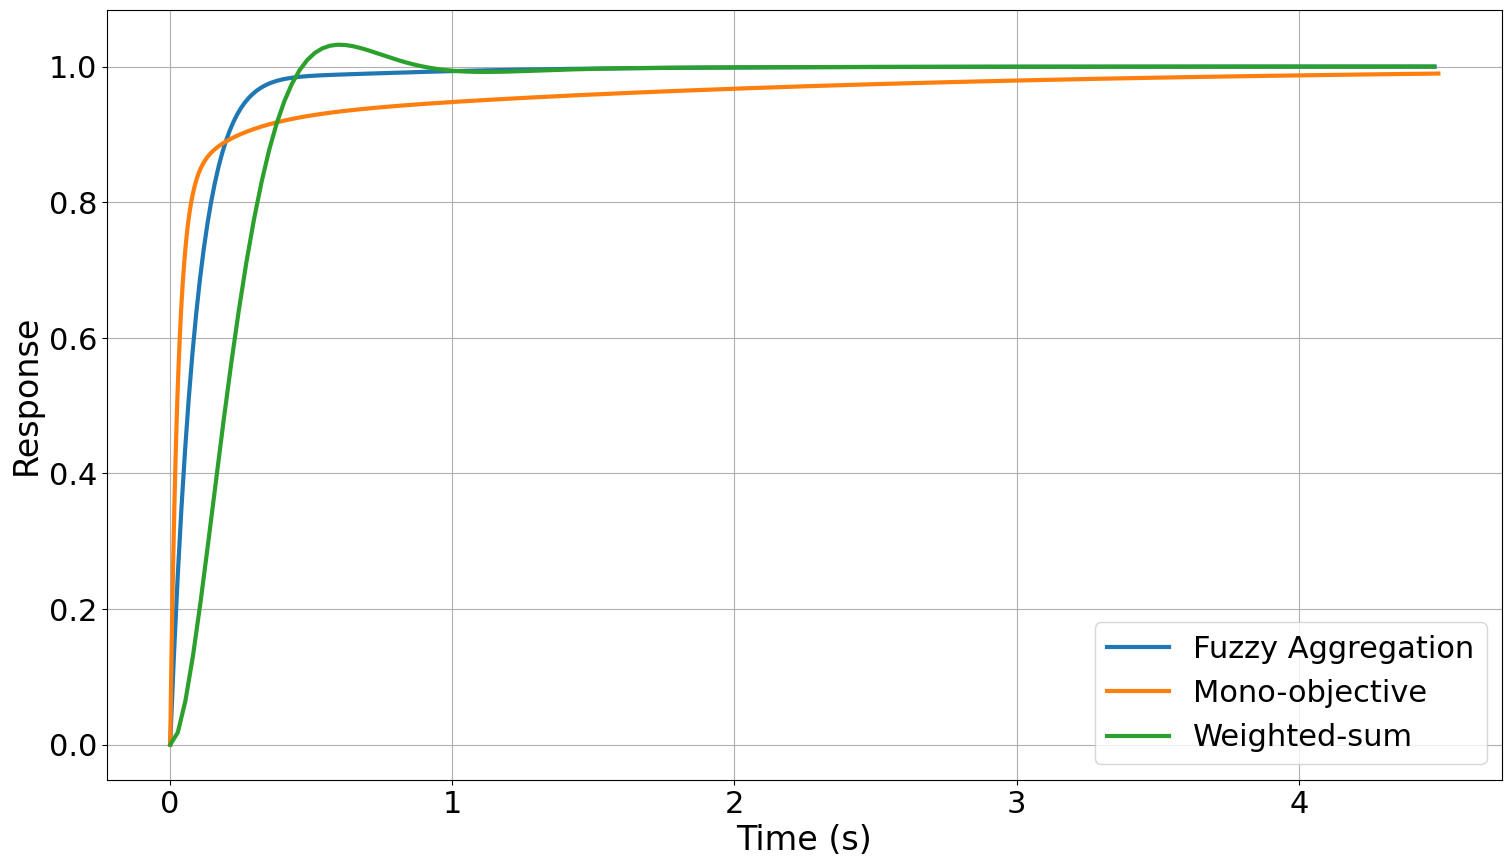

In [294]:
plt.figure(figsize=(18,10))
a = 3
b = 4
c = 1
l_a = int(0.3*len(metrics_0[a]['t']))
l_b = int(0.3*len(metrics_0_m[b]['t']))
l_c = int(0.3*len(metrics_0_ws[c]['t']))
plt.plot(metrics_0_ws[c]['t'][:l_c], metrics_0_ws[c]['res'][:l_c],label='Fuzzy Aggregation', linewidth=3)
plt.plot(metrics_0_m[b]['t'][:l_b], metrics_0_m[b]['res'][:l_b], label='Mono-objective', linewidth=3)
plt.plot(metrics_0[a]['t'][:l_a], metrics_0[a]['res'][:l_a], label='Weighted-sum', linewidth=3)

plt.grid()
plt.legend()
plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Response', fontsize=24)
plt.show()

## 1. Case Study

In [14]:
num = [4]
den = [1, 0.5, 0]
T = 0.2

### 1. Using Fuzzy Aggregator

In [15]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, num=num, den=den, T=T)
results_1, metrics_1 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [ 1.  4. 15.  5.  5.  4.  0.  6.  4. -6. 10. -7.]

 Objective function:
 1.0
[  110000  4300000   160000 10000000]
[1.5e-05 2.7e-06]
Kp = 2790.40404040404, Kd = 4031.25, Ki = 210.43771043771045
Settling time: 0.09 s, rise time: 0.05 s, overshoot: 0.00 %
|||_______________________________________________ 6.7% GA is running...Settling time: 0.09 s, rise time: 0.05 s, overshoot: 0.00 %
Settling time: 0.03 s, rise time: 0.02 s, overshoot: 0.00 %
|||||_____________________________________________ 10.0% GA is running...Settling time: 0.08 s, rise time: 0.04 s, overshoot: 0.00 %
Settling time: 0.10 s, rise time: 0.02 s, overshoot: 2.01 %
Settling time: 0.02 s, rise time: 0.01 s, overshoot: 0.70 %
|||||||___________________________________________ 13.3% GA is running...Settling time: 0.09 s, rise time: 0.05 s, overshoot: 0.00 %
Settling time: 0.10 s, rise time: 0.05 s, overshoot: 0.00 %
||||||

### 2. Using Weighted-sum

In [16]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_1_ws, metrics_1_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit,  trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [20.  6. 19.  5.  0.  4.  5.  5.  0. -7. 22. -7.]

 Objective function:
 0.005208333333333333
[68000000  6200000   100000  1600000]
[1.0e-06 8.2e-06]
Kp = 3.410043041606887, Kd = 99.2, Ki = 0.028694404591104738
 The best solution found:                                                                           
 [ 9.  5.  5.  5. 11.  5. 13.  6. 17. -7. 13. -6.]

 Objective function:
 0.00528169014084507
[ 2400000  1600000  3000000 36000000]
[5.1e-06 3.6e-05]
Kp = 9.7, Kd = 97.92, Ki = 0.13888888888888887
 The best solution found:                                                                           
 [22.  3.  9.  6. 21.  3. 21.  2. 14. -6.  6. -7.]

 Objective function:
 0.005524861878453039
[   82000 24000000    75000     7500]
[3.9e-05 1.8e-06]
Kp = 31.434959349593495, Kd = 93.6, Ki = 0.6775067750677508
 The best solution found:                                                    

### 3. Using mono-objective

In [17]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_1_m, metrics_1_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [10.  5. 18.  6.  8.  5. 21.  5. 17. -8.  2. -7.]

 Objective function:
 0.08561470779881092
[ 2700000 56000000  2200000  7500000]
[5.1e-07 1.2e-06]
Kp = 72.15593434343434, Kd = 97.36363636363635, Ki = 1.0521885521885523
 The best solution found:                                                                           
 [ 8.  5.  9.  5. 14.  2. 16.  2. 12. -6.  1. -6.]

 Objective function:
 0.08653101461866697
[2200000 2400000    3900    4700]
[3.3e-05 1.1e-05]
Kp = 4.93006993006993, Kd = 95.44615384615385, Ki = 0.049798686162322525
 The best solution found:                                                                           
 [16.  5.  5.  5.  2.  3. 12.  5.  8. -8. 23. -6.]

 Objective function:
 0.08585294910328745
[4700000 1600000   12000 3300000]
[2.2e-07 9.1e-05]
Kp = 94.28185644143092, Kd = 96.80000000000003, Ki = 0.6429740472293665
 The best solution found:             

### Results

In [18]:
# avg_1 = metrics_1.mean(axis=0)
# std_1 = metrics_1.std(axis=0)
# print(avg_1)
# print(std_1)

# avg_1_ws = metrics_1_ws.mean(axis=0)
# std_1_ws = metrics_1_ws.std(axis=0)
# print(avg_1_ws)
# print(std_1_ws)

# avg_1_m = metrics_1_m.mean(axis=0)
# std_1_m = metrics_1_m.std(axis=0)
# print(avg_1_m)
# print(std_1_m)


In [212]:
len(response)//2.5

106.0

In [270]:
pid_controller = ctrl.TransferFunction([100, 70, 10], [10, 80,1])
plant = ctrl.TransferFunction([4],[1, 0.5, 1])
closed_loop_system = ctrl.feedback(pid_controller * plant)
time, response = ctrl.step_response(closed_loop_system, T=7.5)

#response[int(len(response)//2.8):] *= 1.05

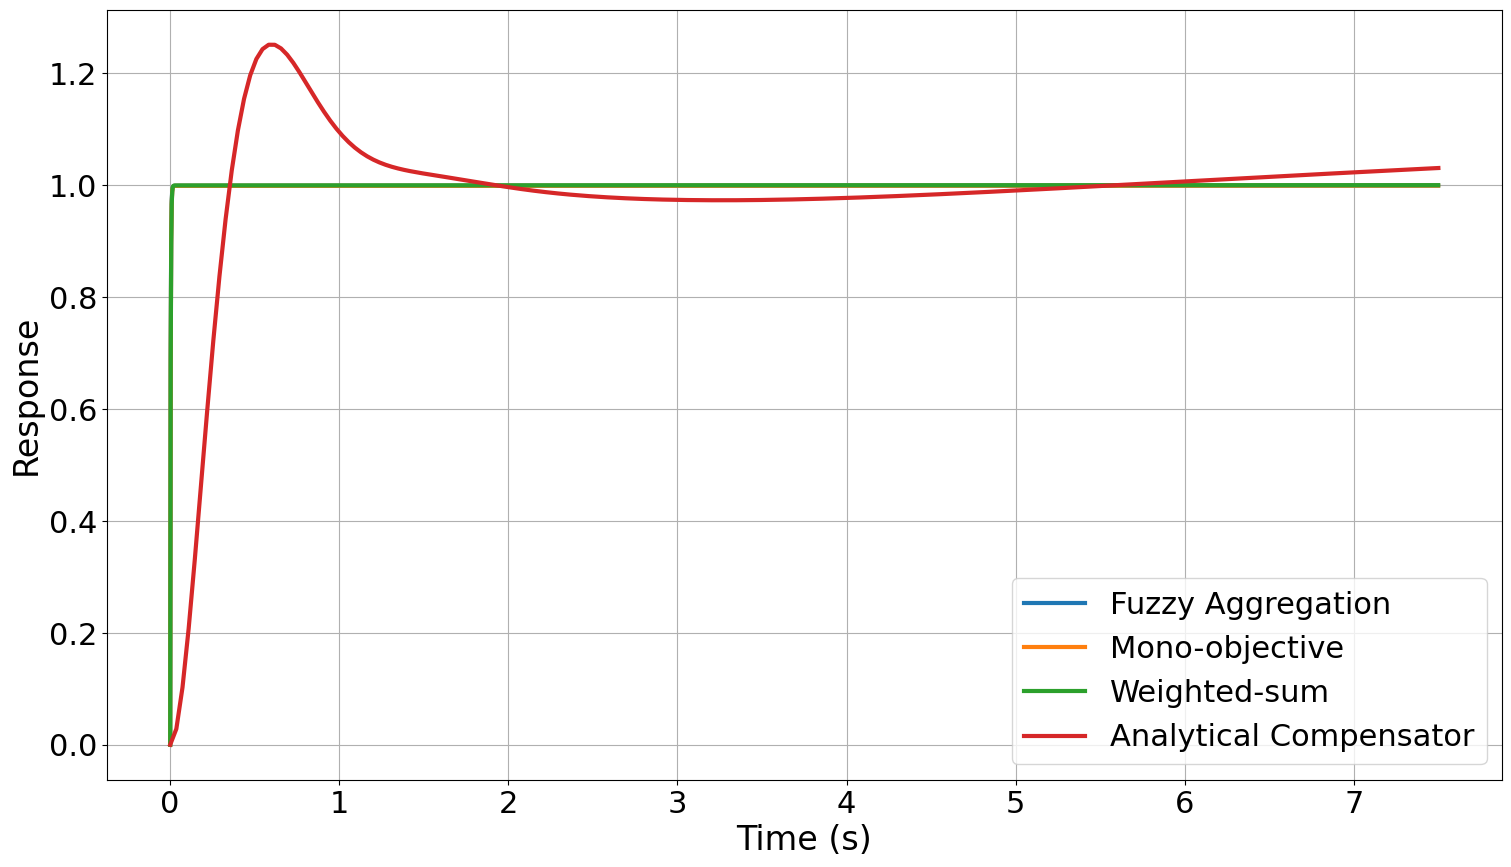

In [271]:
plt.figure(figsize=(18,10))
a = 1
b = 1
c = 2
t = int(len(metrics_1[a]['t'])*0.5)
plt.plot(metrics_1[a]['t'][:t], metrics_1[a]['res'][:t],label='Fuzzy Aggregation', linewidth=3)
plt.plot(metrics_1_m[b]['t'][:t], metrics_1_m[b]['res'][:t], label='Mono-objective', linewidth=3)
plt.plot(metrics_1_ws[c]['t'][:t], metrics_1_ws[c]['res'][:t], label='Weighted-sum', linewidth=3)
plt.plot(time, response/0.85, label='Analytical Compensator', linewidth=3)
plt.grid()
plt.legend()
plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Response', fontsize=24)
plt.show()

## 2. Case Study

In [19]:
num = [1]
den = [1, 6, 5, 0]
T = 2

### 1. Using Fuzzy Aggregator

In [20]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, num=num, den=den, T=T)

results_2, metrics_2 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

||________________________________________________ 3.3% GA is running...Settling time: 1.00 s, rise time: 1.25 s, overshoot: 0.00 %
||||||||__________________________________________ 16.7% GA is running...Settling time: 1.00 s, rise time: 0.36 s, overshoot: 12.18 %
||||||||||________________________________________ 20.0% GA is running...Settling time: 1.00 s, rise time: 1.27 s, overshoot: 0.00 %
||||||||||||______________________________________ 23.3% GA is running...Settling time: 1.00 s, rise time: 1.27 s, overshoot: 0.00 %
Settling time: 1.00 s, rise time: 1.27 s, overshoot: 0.00 %
Settling time: 1.00 s, rise time: 0.18 s, overshoot: 30.56 %
Settling time: 1.00 s, rise time: 0.18 s, overshoot: 24.85 %
|||||||||||||||___________________________________ 30.0% GA is running...Settling time: 1.00 s, rise time: 0.32 s, overshoot: 32.36 %
||||||||||||||||||________________________________ 36.7% GA is running...Settling time: 1.00 s, rise time: 0.34 s, overshoot: 33.69 %
||||||||||||||||||

### 2. Using Weighted-sum

In [21]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_2_ws, metrics_2_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [ 0.  5.  5.  4. 15.  3. 15.  5.  8. -7.  8. -6.]

 Objective function:
 0.47755128417470893
[1000000  160000   43000 4300000]
[2.2e-06 2.2e-05]
Kp = 26.000000000000004, Kd = 35.2, Ki = 4.545454545454546
 The best solution found:                                                                           
 [ 2.  6. 16.  3.  9.  2. 19.  4. 13. -7. 14. -6.]

 Objective function:
 0.4750827017542861
[12000000    47000     2400   620000]
[3.6e-06 3.9e-05]
Kp = 24.857959401709397, Kd = 43.709999999999994, Ki = 0.551994301994302
 The best solution found:                                                                           
 [11.  5. 18.  5.  7.  3.  6.  4. 18. -8. 22. -6.]

 Objective function:
 0.4763096194626888
[3000000 5600000   20000  180000]
[5.6e-07 8.2e-05]
Kp = 16.861463414634148, Kd = 28.224, Ki = 0.036585365853658534
 The best solution found:                                    

### 3. Using mono-objective

In [22]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_2_m, metrics_2_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [ 4.  4. 13.  6.  1.  4. 23.  2.  9. -6. 21. -8.]

 Objective function:
 0.2576290995750678
[  150000 36000000   110000     9100]
[2.4e-05 7.5e-07]
Kp = 22.50181818181818, Kd = 71.47636363636363, Ki = 0.7353535353535353
 The best solution found:                                                                           
 [17.  6.  9.  4. 17.  2. 20.  2. 21. -6. 17. -7.]

 Objective function:
 0.3246774374616258
[51000000   240000     5100     6800]
[7.5e-05 5.1e-06]
Kp = 19.614117647058826, Kd = 24.0, Ki = 0.005126233499935923
 The best solution found:                                                                           
 [17.  4. 12.  6.  0.  6. 11.  5. 23. -7.  7. -8.]

 Objective function:
 0.2502217613842656
[  510000 33000000 10000000  3000000]
[9.1e-06 2.0e-07]
Kp = 33.061764705882354, Kd = 90.08999999999999, Ki = 2.9411764705882355
 The best solution found:                  

### Results

In [231]:
num = [1]
den = [1, 6, 5, 0]

pid_controller = ctrl.TransferFunction([30.32, 39.42, 12.81], [1, 0])
plant = ctrl.TransferFunction(num, den)
closed_loop_system = ctrl.feedback(pid_controller * plant)
time, response = ctrl.step_response(closed_loop_system, T=15)

#response[int(len(response)//2.8):] = 0.85

In [23]:
# avg_2 = metrics_2.mean(axis=0)
# std_2 = metrics_2.std(axis=0)

# avg_2_ws = metrics_2_ws.mean(axis=0)
# std_2_ws = metrics_2_ws.std(axis=0)

# avg_2_m = metrics_2_m.mean(axis=0)
# std_2_m = metrics_2_m.std(axis=0)

In [24]:
# print(avg_2)
# print(std_2)
# print(avg_2_ws)
# print(std_2_ws)
# print(avg_2_m)
# print(std_2_m)

284

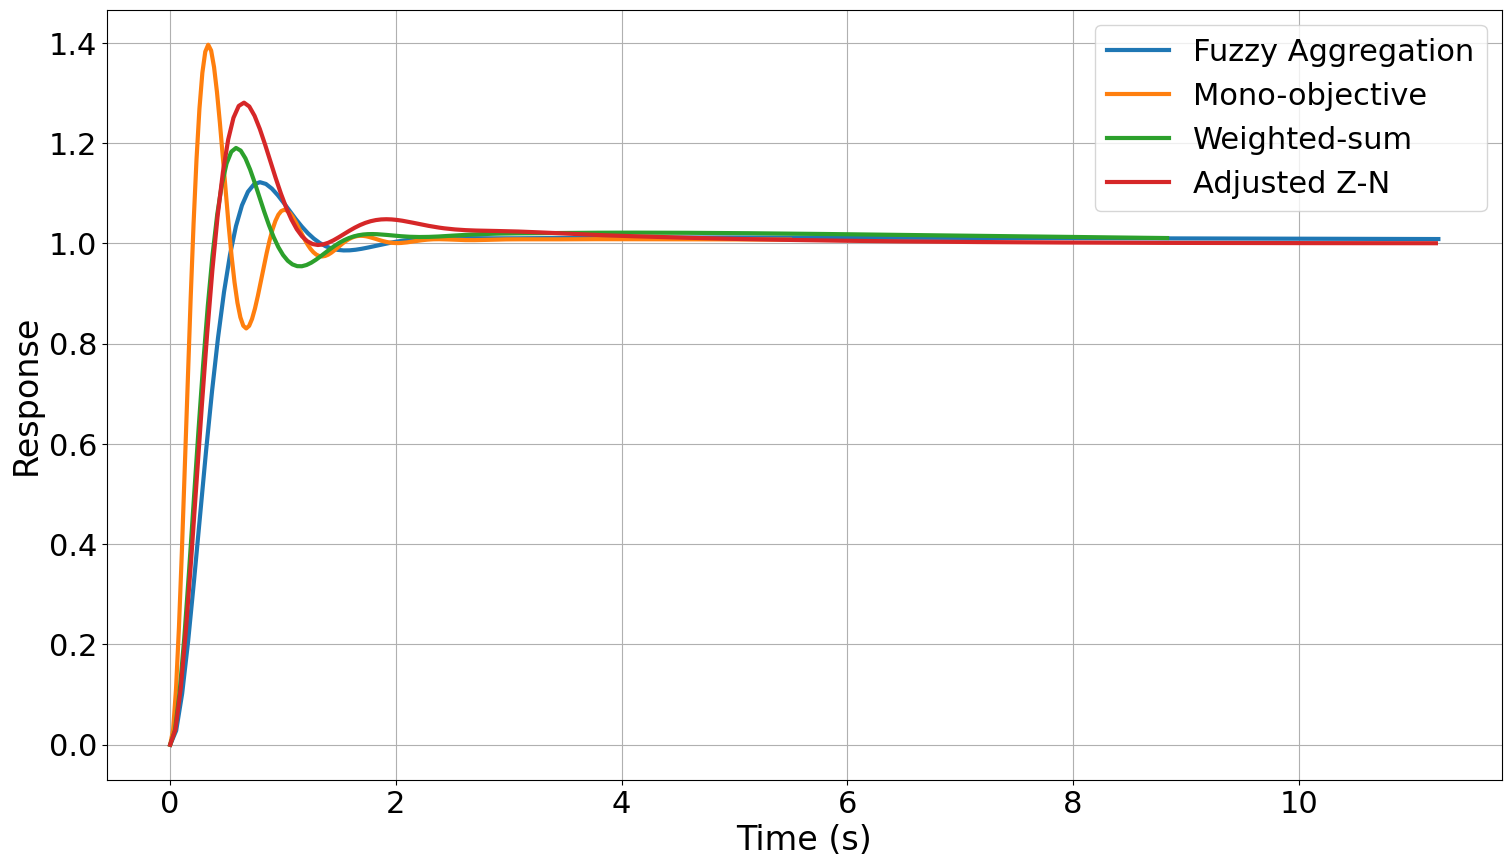

In [236]:
plt.figure(figsize=(18,10))
a = 0
b = 4
c = 0

tt = int(len(metrics_2[a]['t'])*3/4)
t = int(len(time)*3/4)
plt.plot(metrics_2[a]['t'][:tt], metrics_2[a]['res'][:tt],label='Fuzzy Aggregation', linewidth=3)
plt.plot(metrics_2_m[b]['t'][:tt], metrics_2_m[b]['res'][:tt], label='Mono-objective', linewidth=3)
plt.plot(metrics_2_ws[c]['t'][:tt], metrics_2_ws[c]['res'][:tt], label='Weighted-sum', linewidth=3)
plt.plot(time[:t], response[:t], label='Adjusted Z-N', linewidth=3)

plt.grid()
plt.legend()
plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Response', fontsize=24)
plt.show()

## 3. Case Study (DC Motor)

In [25]:
num = [5.5]
den = [0.13, 1, 0]
T = 0.2

### 1. Using Fuzzy Aggregator

In [26]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, num=num, den=den, T=T)

results_3, metrics_3 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

Settling time: 0.17 s, rise time: 0.02 s, overshoot: 0.00 %
Settling time: 0.02 s, rise time: 0.01 s, overshoot: 0.00 %
||________________________________________________ 3.3% GA is running...Settling time: 0.00 s, rise time: 0.00 s, overshoot: 0.00 %
|||_______________________________________________ 6.7% GA is running...Settling time: 0.01 s, rise time: 0.00 s, overshoot: 0.00 %
|||||_____________________________________________ 10.0% GA is running...Settling time: 0.00 s, rise time: 0.00 s, overshoot: 0.00 %
|||||||___________________________________________ 13.3% GA is running...Settling time: 0.02 s, rise time: 0.01 s, overshoot: 1.61 %
Settling time: 0.01 s, rise time: 0.01 s, overshoot: 0.00 %
Settling time: 0.09 s, rise time: 0.02 s, overshoot: 3.52 %
||||||||__________________________________________ 16.7% GA is running...Settling time: 0.00 s, rise time: 0.00 s, overshoot: 0.00 %
||||||||||________________________________________ 20.0% GA is running...Settling time: 0.01 s, r

### 2. Using Weighted-sum

In [27]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_3_ws, metrics_3_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [20.  3. 19.  6. 20.  5. 10.  4. 14. -6. 20. -7.]

 Objective function:
 0.000520104020804161
[   68000 62000000  6800000   270000]
[3.9e-05 6.8e-06]
Kp = 36.43014705882353, Kd = 96.00882352941177, Ki = 0.08586912273559943
 The best solution found:                                                                           
 [ 5.  6. 18.  5. 22.  3.  2.  4.  2. -6.  2. -6.]

 Objective function:
 0.0005067680202707209
[16000000  5600000    82000   120000]
[1.2e-05 1.2e-05]
Kp = 1.975609756097561, Kd = 98.34146341463415, Ki = 0.007621951219512195
 The best solution found:                                                                           
 [18.  3. 19.  5. 16.  5.  6.  5. 14. -6. 15. -6.]

 Objective function:
 0.0005334400213376009
[  56000 6200000 4700000 1800000]
[3.9e-05 4.3e-05]
Kp = 42.74856860111685, Kd = 92.60425531914893, Ki = 0.15904432035060437
 The best solution found: 

### 3. Using mono-objective

In [28]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_3_m, metrics_3_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [ 1.  5. 21.  6. 10.  6.  7.  6.  6. -7.  5. -7.]

 Objective function:
 0.02645769250283145
[ 1100000 75000000 27000000 20000000]
[1.8e-06 1.6e-06]
Kp = 51.33838383838384, Kd = 100.0, Ki = 0.4208754208754209
 The best solution found:                                                                           
 [17.  5. 23.  6.  8.  3. 16.  2. 16. -7. 23. -9.]

 Objective function:
 0.02750684293767368
[ 5100000 91000000    22000     4700]
[4.7e-06 9.1e-08]
Kp = 14.845908992967814, Kd = 91.37227272727272, Ki = 0.4603239897357544
 The best solution found:                                                                           
 [16.  6. 22.  6. 18.  5. 22.  6. 21. -9.  6. -9.]

 Objective function:
 0.02765552283485363
[47000000 82000000  5600000 82000000]
[7.5e-08 1.8e-08]
Kp = 86.55901722391083, Kd = 90.05357142857144, Ki = 17.30834177642688
 The best solution found:                  

### Results

In [29]:
# avg_3 = metrics_3.mean(axis=0)
# std_3 = metrics_3.std(axis=0)

# avg_3_ws = metrics_3_ws.mean(axis=0)
# std_3_ws = metrics_3_ws.std(axis=0)

# avg_3_m = metrics_3_m.mean(axis=0)
# std_3_m = metrics_3_m.std(axis=0)

## 4. Case Study

In [30]:
num = [1, 5, 6]
den = [1, 6, 5, 0]
T = 0.2

### 1. Using Fuzzy Aggregator

In [31]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, num=num, den=den, T=T)

results_4, metrics_4 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

Settling time: 0.13 s, rise time: 0.07 s, overshoot: 0.00 %
Settling time: 0.17 s, rise time: 0.10 s, overshoot: 0.00 %
Settling time: 0.07 s, rise time: 0.04 s, overshoot: 0.37 %
||________________________________________________ 3.3% GA is running...Settling time: 0.07 s, rise time: 0.04 s, overshoot: 0.37 %
|||_______________________________________________ 6.7% GA is running...Settling time: 0.07 s, rise time: 0.04 s, overshoot: 0.37 %
Settling time: 0.08 s, rise time: 0.04 s, overshoot: 0.39 %
|||||_____________________________________________ 10.0% GA is running...Settling time: 0.13 s, rise time: 0.07 s, overshoot: 0.16 %
Settling time: 0.05 s, rise time: 0.03 s, overshoot: 0.31 %
Settling time: 0.09 s, rise time: 0.05 s, overshoot: 0.00 %
Settling time: 0.06 s, rise time: 0.03 s, overshoot: 0.74 %
Settling time: 0.07 s, rise time: 0.04 s, overshoot: 0.37 %
|||||||___________________________________________ 13.3% GA is running...Settling time: 0.08 s, rise time: 0.05 s, overshoo

### 2. Using Weighted-sum

In [32]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_4_ws, metrics_4_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [ 17.   2.  23.   5.  11.   4.   5.   3.  10. -10.  22.  -7.]

 Objective function:
 0.023809523809523808
[   5100 9100000  300000   16000]
[2.7e-09 8.2e-06]
Kp = 95.16341625378605, Kd = 0.0013104, Ki = 1.2753068707157662
 The best solution found:                                                                           
 [ 21.   4.  12.   6.   2.   3.  10.   3.   4. -10.  17.  -7.]

 Objective function:
 0.024936386768447838
[  750000 33000000    12000    27000]
[1.5e-09 5.1e-06]
Kp = 99.0006617647059, Kd = 0.111375, Ki = 0.5882352941176471
 The best solution found:                                                                           
 [ 16.   4.   2.   6.   5.   2.  19.   2.  15. -12.   1.  -7.]

 Objective function:
 0.02252873563218391
[  470000 12000000     1600     6200]
[4.3e-11 1.1e-06]
Kp = 98.9363216900387, Kd = 0.0019995, Ki = 7.495164410058027
 The best solution found:

### 3. Using mono-objective

In [33]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_4_m, metrics_4_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [ 6.  2. 13.  6. 18.  6.  9.  4. 16. -6.  3. -6.]

 Objective function:
 0.06224277613317211
[    1800 36000000 56000000   240000]
[4.7e-05 1.3e-05]
Kp = 85.72978021978021, Kd = 7.251428571428572, Ki = 0.1831501831501832
 The best solution found:                                                                           
 [17.  3. 23.  5. 17.  3. 10.  3.  0. -6.  2. -6.]

 Objective function:
 0.01808745511340475
[  51000 9100000   51000   27000]
[1.0e-05 1.2e-05]
Kp = 94.90484429065744, Kd = 48.17647058823528, Ki = 0.8650519031141869
 The best solution found:                                                                           
 [14.  3. 17.  3.  4.  4.  0.  6.  3. -7.  9. -6.]

 Objective function:
 0.07327408553684198
[   39000    51000   150000 10000000]
[1.3e-06 2.4e-05]
Kp = 90.7905982905983, Kd = 4.419999999999999, Ki = 71.22507122507122
 The best solution found:            

### Results

In [34]:
# avg_4 = metrics_4.mean(axis=0)
# std_4 = metrics_4.std(axis=0)

# avg_4_ws = metrics_4_ws.mean(axis=0)
# std_4_ws = metrics_4_ws.std(axis=0)

# avg_4_m = metrics_4_m.mean(axis=0)
# std_4_m = metrics_4_m.std(axis=0)

In [35]:
# print(avg_4)
# print(std_4)
# print(avg_4_ws)
# print(std_4_ws)
# print(avg_4_m)
# print(std_4_m)


In [ ]:
num = [1]
den = [1, 6, 5, 0]



#response[int(len(response)//2.8):] = 0.85

100
384


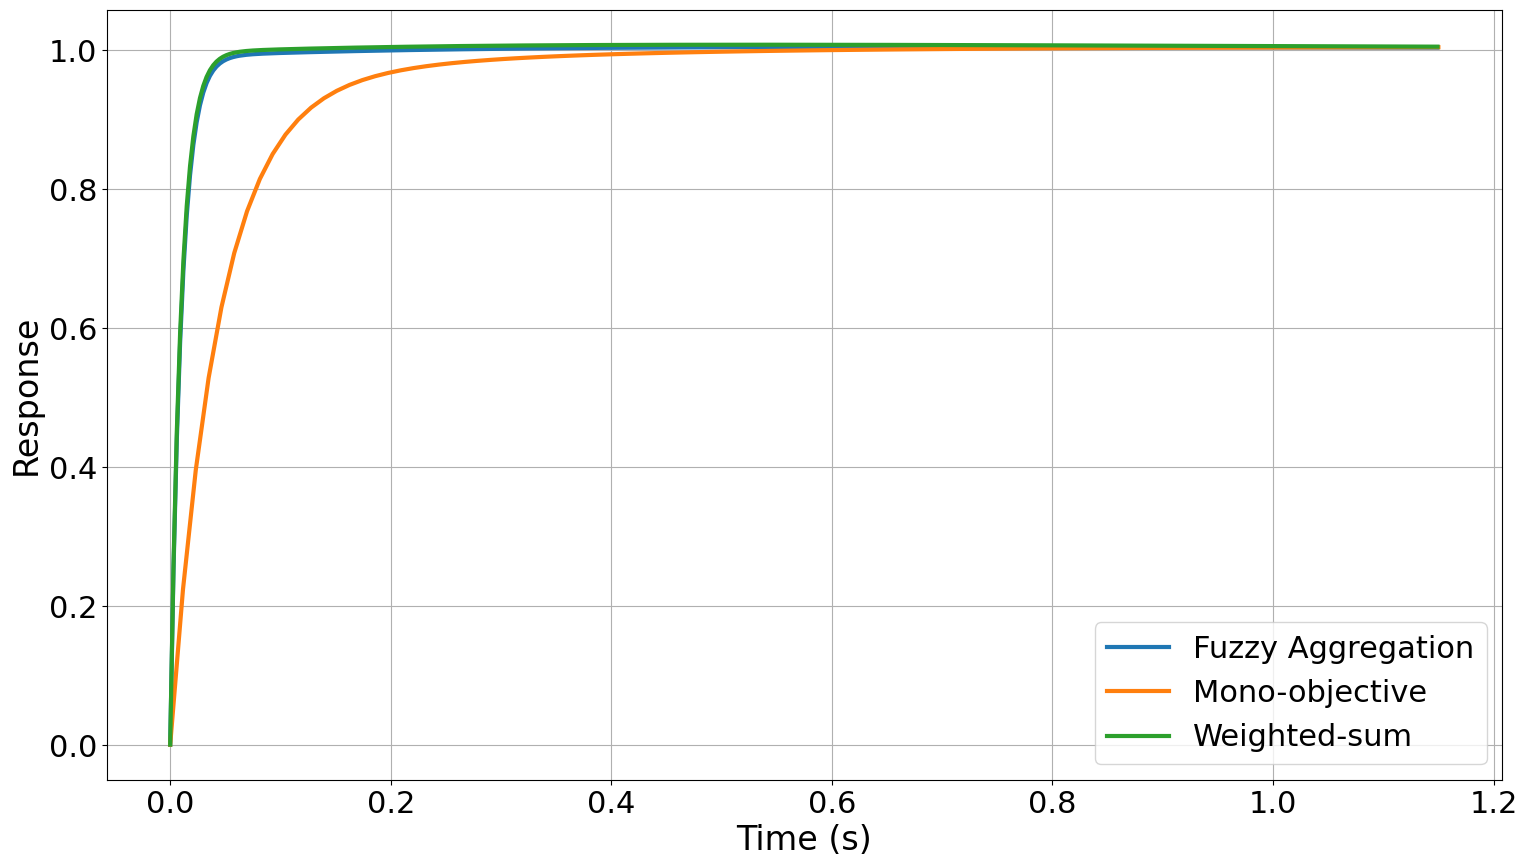

In [291]:
num = [1, 5, 6]
den = [1, 6, 5, 0]

plt.figure(figsize=(18,10))
a = 0
b = 0
c = 4
t = int(len(metrics_4_m[a]['t'])/3)

pid_controller = ctrl.TransferFunction([metrics_4_m[b]['Kd'], metrics_4_m[b]['Kp'], metrics_4_m[b]['Ki']], [1, 0])
plant = ctrl.TransferFunction(num, den)
closed_loop_system = ctrl.feedback(pid_controller * plant)
time, response = ctrl.step_response(closed_loop_system, T=1.15)

print(len(response))
print(len(metrics_4[a]['t'][:t]))

plt.plot(metrics_4[a]['t'][:t], metrics_4[a]['res'][:t],label='Fuzzy Aggregation', linewidth=3)
plt.plot(time, response*metrics_4[a]['res'][:100], label='Mono-objective', linewidth=3)
plt.plot(metrics_4_ws[c]['t'][:t], metrics_4_ws[c]['res'][:t], label='Weighted-sum', linewidth=3)
plt.grid()
plt.legend()
plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Response', fontsize=24)
plt.show()

## 5. Case Study

In [36]:
num = [5]
den = [15, 8, 1]
T = 0.2

### 1. Using Fuzzy Aggregator

In [37]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, num=num, den=den, T=T)

results_5, metrics_5 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

||||||||||||||||||________________________________ 36.7% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
||||||||||||||||||||______________________________ 40.0% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
|||||||||||||||||||||||||_________________________ 50.0% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
|||||||||||||||||||||||||||_______________________ 53.3% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.78 %
||||||||||||||||||||||||||||______________________ 56.7% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
||||||||||||||||||||||||||||||____________________ 60.0% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
|||||||||||||||||||||||||||||||||_________________ 66.7% GA is running...Settling time: 0.18 s, rise time: 0.13 s, overshoot: 1.88 %
Settling 

### 2. Using Weighted-sum

In [38]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_5_ws, metrics_5_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [14.  5. 11.  5. 19.  2.  4.  4.  2. -7. 17. -8.]

 Objective function:
 0.06846928410255036
[3900000 3000000    6200  150000]
[1.2e-06 5.1e-07]
Kp = 75.53641804116188, Kd = 87.09677419354838, Ki = 12.163674402763588
 The best solution found:                                                                           
 [ 21.   2.  10.   4.  12.   5.  14.   2.   5. -11.   3. -10.]

 Objective function:
 1.0
[   7500  270000 3300000    3900]
[1.6e-10 1.3e-09]
Kp = 0.042690909090909085, Kd = 5.1054545454545455e-08, Ki = 121.21212121212122
 The best solution found:                                                                           
 [15.  6.  5.  6. 16.  3. 17.  4. 17. -8. 21. -9.]

 Objective function:
 0.06713094202193669
[43000000 16000000    47000   510000]
[5.1e-07 7.5e-08]
Kp = 77.82483918852051, Kd = 88.54468085106383, Ki = 3.364670954972785
 The best solution found:           

### 3. Using mono-objective

In [39]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_5_m, metrics_5_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=30, popsize=50, T=T)

 The best solution found:                                                                           
 [20.  4. 22.  5.  3.  3. 15.  3. 13. -7. 10. -8.]

 Objective function:
 0.28364538075209184
[ 680000 8200000   13000   43000]
[3.6e-06 2.7e-07]
Kp = 83.9894419306184, Kd = 97.64307692307692, Ki = 18.015753309870956
 The best solution found:                                                                           
 [ 6.  5. 19.  4. 18.  2. 18.  3.  5. -6.  6. -7.]

 Objective function:
 0.28135235872653275
[1800000  620000    5600   56000]
[1.6e-05 1.8e-06]
Kp = 92.33333333333331, Kd = 99.2, Ki = 3.0864197530864197
 The best solution found:                                                                           
 [16.  6.  9.  6.  2.  4.  4.  6. 12. -9.  2. -8.]

 Objective function:
 0.2814082477962238
[47000000 24000000   120000 15000000]
[3.3e-08 1.2e-07]
Kp = 98.20478723404256, Kd = 99.00000000000001, Ki = 22.163120567375884
 The best solution found:                             

### Results

In [40]:
# avg_5 = metrics_5.mean(axis=0)
# std_5 = metrics_5.std(axis=0)

# avg_5_ws = metrics_5_ws.mean(axis=0)
# std_5_ws = metrics_5_ws.std(axis=0)

# avg_5_m = metrics_5_m.mean(axis=0)
# std_5_m = metrics_5_m.std(axis=0)

## 6. Case Study

In [41]:
num = [1]
den = [3, 6, 5, 0]
T = 8

### 1. Using Fuzzy Aggregator

In [42]:
fuzzy_aggregator = fuzzy_aggregator_circuit_fitness(fuzzy_evaluator, num=num, den=den, T=T)

results_6, metrics_6 = run_experiment(num, den, fuzzy_aggregator, create_control_system_circuit, trials=5, epochs=100, popsize=50, T=T)

||||||||||||||||||________________________________ 37.0% GA is running...Settling time: 1.00 s, rise time: 0.25 s, overshoot: 46.29 %
|||||||||||||||||||_______________________________ 38.0% GA is running...Settling time: 1.00 s, rise time: 0.39 s, overshoot: 35.15 %
||||||||||||||||||||______________________________ 39.0% GA is running...Settling time: 1.00 s, rise time: 0.89 s, overshoot: 46.70 %
|||||||||||||||||||||_____________________________ 42.0% GA is running...Settling time: 1.00 s, rise time: 0.32 s, overshoot: 46.00 %
||||||||||||||||||||||____________________________ 43.0% GA is running...Settling time: 1.00 s, rise time: 0.27 s, overshoot: 45.17 %
|||||||||||||||||||||||___________________________ 46.0% GA is running...Settling time: 1.00 s, rise time: 0.22 s, overshoot: 54.34 %
Settling time: 1.00 s, rise time: 0.39 s, overshoot: 35.15 %
||||||||||||||||||||||||__________________________ 47.0% GA is running...Settling time: 1.00 s, rise time: 0.36 s, overshoot: 40.28 %
|

### 2. Using Weighted-sum

In [43]:
weighted_sum_fitness = weighted_sum_circuit_fitness(num=num, den=den, T=T)
results_6_ws, metrics_6_ws = run_experiment(num, den, weighted_sum_fitness, create_control_system_circuit, trials=5, epochs=100, popsize=50, T=T)

 The best solution found:                                                                           
 [22.  4. 18.  6.  0.  6. 22.  3. 18. -6. 20. -9.]

 Objective function:
 0.5493801770254562
[  820000 56000000 10000000    82000]
[5.6e-05 6.8e-08]
Kp = 7.312941176470588, Kd = 25.715199999999996, Ki = 0.14705882352941177
 The best solution found:                                                                           
 [ 7.  5.  8.  6.  5.  3.  2.  3.  4. -7. 23. -6.]

 Objective function:
 0.5528118677997669
[ 2000000 22000000    16000    12000]
[1.5e-06 9.1e-05]
Kp = 8.262362637362637, Kd = 24.750000000000004, Ki = 0.004120879120879122
 The best solution found:                                                                           
 [ 7.  4. 22.  6.  3.  5.  4.  3. 10. -6. 10. -8.]

 Objective function:
 0.5418839004932916
[  200000 82000000  1300000    15000]
[2.7e-05 2.7e-07]
Kp = 5.884615384615385, Kd = 25.546153846153842, Ki = 0.21367521367521367
 The best solution found:  

### 3. Using mono-objective

In [44]:
mono_objective_fitness = mono_objective_circuit_fitness(num=num, den=den, T=T)
results_6_m, metrics_6_m = run_experiment(num, den, mono_objective_fitness, create_control_system_circuit, trials=5, epochs=100, popsize=50, T=T)

 The best solution found:                                                                           
 [16.  5. 16.  5.  8.  3. 21.  3. 19. -7. 13. -7.]

 Objective function:
 0.19266337461859842
[4700000 4700000   22000   75000]
[6.2e-06 3.6e-06]
Kp = 9.280303030303031, Kd = 99.3409090909091, Ki = 0.20148291424887171
 The best solution found:                                                                           
 [23.  3. 13.  5.  0.  6. 11.  5. 23. -6. 17. -6.]

 Objective function:
 0.19369082357779677
[   91000  3600000 10000000  3000000]
[9.1e-05 5.1e-05]
Kp = 12.403425985778927, Kd = 98.27999999999997, Ki = 0.06464124111182935
 The best solution found:                                                                           
 [21.  5. 23.  6.  1.  6. 21.  5.  5. -7. 23. -8.]

 Objective function:
 0.192775740543806
[ 7500000 91000000 11000000  7500000]
[1.6e-06 9.1e-07]
Kp = 9.47152847152847, Kd = 99.27272727272727, Ki = 0.0999000999000999
 The best solution found:           

In [45]:
# avg_6 = metrics_6.mean(axis=0)
# std_6 = metrics_6.std(axis=0)

# avg_6_ws = metrics_6_ws.mean(axis=0)
# std_6_ws = metrics_6_ws.std(axis=0)

# avg_6_m = metrics_6_m.mean(axis=0)
# std_6_m = metrics_6_m.std(axis=0)

## Outro

In [46]:
import control as ctrl 
from control import TransferFunction as tf

In [47]:
plant = tf(num, den)  
Kp = 504884.1846153846/100
Kd = 16531.2/100
Ki = 8205.128205128205/100

pid_controller = tf([Kd, Kp , Ki], [1, 0])

closed_loop_system = ctrl.feedback(pid_controller * plant)
time, response = ctrl.step_response(closed_loop_system)

info = ctrl.step_info(closed_loop_system)

info

{'RiseTime': 0.08806845280646794,
 'SettlingTime': nan,
 'SettlingMin': -466.7533197911998,
 'SettlingMax': 330.80222366598093,
 'Overshoot': 32980.22236659809,
 'Undershoot': 46675.331979119976,
 'Peak': 466.7533197911998,
 'PeakTime': 1.5474885278850794,
 'SteadyStateValue': 1.0}